In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Set the directory path where you want to load the CSV file
dir_path = "Downloads\Accenture"
file_path = os.path.join(dir_path, "remerged_data.csv")
df = pd.read_csv(file_path, index_col=0)

In [2]:
df.head()

,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
Content ID,,,,,,
97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07/11/2020 09:43,photo,Studying,negative,0
97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06/01/2021 19:13,photo,Studying,negative,0
97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,09/04/2021 02:46,photo,Studying,negative,0
9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,28/03/2021 21:15,photo,healthy eating,negative,0
230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,04/08/2020 05:40,photo,healthy eating,negative,0


In [4]:
# Check for missing values
display(df.isnull().sum())

# Check data types
display(df.dtypes)

display(df.duplicated())

Reaction Type    0
Datetime         0
Content Type     0
Category         0
Sentiment        0
Score            0
dtype: int64

Reaction Type    object
Datetime         object
Content Type     object
Category         object
Sentiment        object
Score             int64
dtype: object

Content ID
97522e57-d9ab-4bd6-97bf-c24d952602d2    False
97522e57-d9ab-4bd6-97bf-c24d952602d2    False
97522e57-d9ab-4bd6-97bf-c24d952602d2    False
9f737e0a-3cdd-4d29-9d24-753f4e3be810    False
230c4e4d-70c3-461d-b42c-ec09396efb3f    False
                                        ...  
435007a5-6261-4d8b-b0a4-55fdc189754b    False
435007a5-6261-4d8b-b0a4-55fdc189754b    False
4e4c9690-c013-4ee7-9e66-943d8cbd27b7    False
4e4c9690-c013-4ee7-9e66-943d8cbd27b7    False
4e4c9690-c013-4ee7-9e66-943d8cbd27b7    False
Length: 22534, dtype: bool

In [3]:
# Descriptive statistics
print(df.describe())

              Score
count  22534.000000
mean      39.650395
std       26.035157
min        0.000000
25%       15.000000
50%       35.000000
75%       65.000000
max       75.000000


In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply the analyzer to calculate sentiment scores for each reaction
df['sentiment_score'] = df['Reaction Type'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Calculate the mean sentiment score for each category
category_sentiment = df.groupby('Category')['sentiment_score'].mean()

In [13]:
display(category_sentiment)

Category
Animals            0.159546
Culture            0.050019
Education          0.043852
Fitness            0.100987
Food               0.036619
Healthy Eating     0.232317
Public Speaking    0.155828
Science            0.105944
Soccer             0.130567
Studying          -0.041302
Technology         0.594467
Travel             0.094241
Veganism           0.260070
animals            0.076386
cooking            0.089371
culture            0.077602
dogs               0.090916
education          0.105595
fitness            0.095134
food               0.087306
healthy eating     0.092860
public speaking    0.110593
science            0.090310
soccer             0.083708
studying           0.097946
technology         0.105904
tennis             0.066983
travel             0.076209
veganism           0.095103
Name: sentiment_score, dtype: float64

In [16]:
# Count the number of reactions for each category
category_counts = df['Category'].value_counts()

# Count the number of negative reactions for each category
negative_counts = df[df['Sentiment'] == 'negative']['Category'].value_counts()

# Calculate the proportion of negative reactions for each category
negative_proportions = negative_counts / category_counts

display(negative_proportions)

Animals            0.282353
Culture            0.270270
Education          0.303030
Fitness            0.325397
Food               0.373494
Healthy Eating          NaN
Public Speaking    0.206897
Science            0.320755
Soccer             0.300000
Studying           0.439024
Technology              NaN
Travel             0.370370
Veganism           0.200000
animals            0.327889
cooking            0.329180
culture            0.318454
dogs               0.302363
education          0.296557
fitness            0.317789
food               0.313646
healthy eating     0.304598
public speaking    0.294388
science            0.296753
soccer             0.301798
studying           0.313223
technology         0.299228
tennis             0.339080
travel             0.324343
veganism           0.310739
Name: Category, dtype: float64

In [34]:
def get_negativity_level(proportion):
    if proportion <= 0.2:
        return "Mostly positive"
    elif proportion <= 0.4:
        return "Slightly negative"
    elif proportion <= 0.6:
        return "Moderately negative"
    elif proportion <= 0.8:
        return "Mostly negative"
    else:
        return "Extremely negative"

In [35]:
df['negativity_level'] = negative_proportions.apply(get_negativity_level)
df.head(20)

,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,sentiment_score,negativity_level
Content ID,,,,,,,,
97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:00,photo,Studying,negative,0,-0.5994,NaN
97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:00,photo,Studying,negative,0,-0.5994,NaN
97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:00,photo,Studying,negative,0,-0.5994,NaN
9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:00,photo,healthy eating,negative,0,-0.5994,NaN
230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:00,photo,healthy eating,negative,0,-0.5994,NaN
3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-01-14 07:21:00,video,dogs,negative,0,-0.5994,NaN
3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-01-13 23:35:00,video,dogs,negative,0,-0.5994,NaN
3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-02-11 20:10:00,video,dogs,negative,0,-0.5994,NaN
b18cb63f-4c8e-44ee-a47f-541e95191d11,disgust,2021-05-27 01:44:00,photo,public speaking,negative,0,-0.5994,NaN


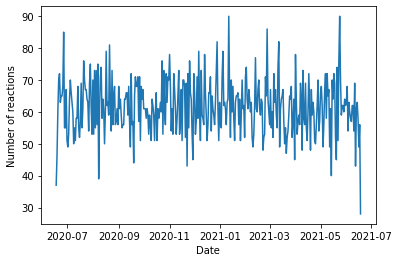

In [17]:
# Convert the 'Datetime' column to a datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d/%m/%Y %H:%M')

# Group the reactions by date and count the number of reactions for each date
daily_counts = df.groupby(pd.Grouper(key='Datetime', freq='D')).size()

# Plot the daily reaction counts over time
plt.plot(daily_counts)
plt.xlabel('Date')
plt.ylabel('Number of reactions')
plt.show()

In [21]:
# Count the number of reactions for each user and category
user_category_counts = df.groupby(['Content ID', 'Category']).size()

# Count the number of negative reactions for each user and category
user_negative_counts = df[df['Sentiment'] == 'negative'].groupby(['Content ID', 'Category']).size()

# Calculate the proportion of negative reactions for each user and category
user_negative_proportions = user_negative_counts / user_category_counts

In [22]:
display(user_negative_proportions)

Content ID                            Category      
004e820e-49c3-4ba2-9d02-62db0065410c  tennis                 NaN
00d0cdf9-5919-4102-bf84-ebde253c3cd2  healthy eating    0.309524
01396602-c759-4a17-90f0-8f9b3ca11b30  tennis            0.416667
019b61f4-926c-438e-adaf-6119c5eab752  fitness           0.333333
01ab84dd-6364-4236-abbb-3f237db77180  food              1.000000
                                                          ...   
fdca8d15-966b-4825-8133-1fafc5c1f9fc  dogs              0.320000
fe06b730-b1f8-4f55-af1a-52487d8f1ec6  animals           0.347826
fea8d77c-fd0b-4678-868f-fbae567642f3  science           0.166667
fea9077f-2fe7-43bd-aaef-dc2619988d94  culture           0.166667
ff883828-a610-492d-8635-8a777eaad25f  education         0.340909
Length: 962, dtype: float64